### Data analysis of Section 17 data.



In [1]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob

plt.set_cmap('jet')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
U matrix (27547, 165)
S matrix (165, 165)

<Figure size 640x480 with 0 Axes>

In [2]:
_,_ = parse_ml_data_folder('%s/Sec 17/250328/'%(ml_data_dir))

Fri Mar 28 10:42:35 2025 	 250328 GMT3 set1 17.2 4 initial gmtMorph170614 -.h5
Fri Mar 28 10:54:06 2025 	 250328 GMT3 set1 17.2 5-7 hp1+ gmtMorph170614 -.h5
Fri Mar 28 10:58:17 2025 	 250328 GMT3 set1 17.2 5-7 hp1- gmtMorph170614 -.h5
Fri Mar 28 11:01:54 2025 	 250328 GMT3 set2 17.2 5-7 hp1- gmtMorph170614 -.h5
Fri Mar 28 11:06:10 2025 	 250328 GMT3 set2 17.2 5-7 hp1+ gmtMorph170614 -.h5
Fri Mar 28 11:10:47 2025 	 250328 GMT3 set1 17.2 5-7 hp2+ gmtMorph170614 -.h5
Fri Mar 28 11:15:13 2025 	 250328 GMT3 set1 17.2 5-7 hp2- gmtMorph170614 -.h5
Fri Mar 28 11:18:49 2025 	 250328 GMT3 set2 17.2 5-7 hp2- gmtMorph170614 -.h5
Fri Mar 28 11:24:18 2025 	 250328 GMT3 set2 17.2 5-7 hp2+ gmtMorph170614 -.h5
Fri Mar 28 11:30:08 2025 	 250328 GMT3 set1 17.2 5-7 hp3+ gmtMorph170614 -.h5
Fri Mar 28 11:34:22 2025 	 250328 GMT3 set1 17.2 5-7 hp3- gmtMorph170614 -.h5
Fri Mar 28 11:37:59 2025 	 250328 GMT3 set2 17.2 5-7 hp3- gmtMorph170614 -.h5
Fri Mar 28 11:42:16 2025 	 250328 GMT3 set2 17.2 5-7 hp3+ gmtMo

In [3]:
df = np.loadtxt('../model_data/HP_xyz.txt') #from Trupti email 3/28/25, in M1B
hpx = df[:,0]
hpy = df[:,1]

### Code below is for calculating the FEM-predicted surfaces myself. On 3/26/2025, Trupti agreed to provide those. So we can ignore this section.

In [4]:
useMyFEMprediction = False

In [5]:
if useMyFEMprediction:
    dataFolder = '/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents'

    #read Af (where hp forces are along the hps)
    df = pd.read_csv(dataFolder+
        '/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal__normalised_whp_02March2025/Afx-whp-02-Mar-2025.csv', header=None)
    Afhp = np.array(df)
    print('Afhp = ', Afhp.shape)
    #165 SAs + 6 HPs

    df = np.loadtxt('../model_data/HP_xy.txt') #from Trupti email, in M1B
    hpx = df[:,0]
    hpy = df[:,1]

In [6]:
if useMyFEMprediction:
    ctrlFolder = '/Users/bxin/gmt_local/modules/ocs_m1_dcs/src/etc/conf/m1_support_pkg/m1_support_ctrl/'
    FB_K_file = 'm1_force_distribution_matrix_conf.coffee'
    filename = os.path.join(ctrlFolder, FB_K_file)

    fid = open(filename)
    KMat = np.zeros((170*3, 6))
    i = 0
    for line in fid:
        if len(line)>50:
            a = re.split('\[|]|,',line)
            a = [x for x in a if (x and not x.isspace() and x!='\n')]
            KMat[i,:] = a
            i += 1

In [7]:
if useMyFEMprediction:
    KMat_df = pd.read_csv(dataFolder+'/influnce_matrix_files/K-30-Jul-2024.csv', header=None)
    KMat_csv = np.array(KMat_df)
    print(KMat_csv.shape)

In [8]:
if useMyFEMprediction:
    #using the recipe Trupti emailed on 3/4/25
    T = np.loadtxt('../model_data/HP_T_force_moments.txt')
    print(T.shape)

    for i in range(1):
        HP_force = np.zeros(6)
        HP_force[i] = 400 #400N
        FM6 = T@HP_force #forces and moments, 6x1 vector
        bf = KMat_csv@FM6
        bfx = bf[:nact]
        bfy = bf[nact:nact*2]
        bfz = bf[nact*2:nact*3]
        #print(bfy.shape)
        fx = np.zeros(nact-5+6)
        fx[:165] = bfx[:165]
        fx[160:165] *= 2
        fx[165:] = HP_force    

        fy = np.zeros(nact-5+6)

        fz = np.zeros(nact-5+6)


### Trupti provided the FEM-predicted surfaces

In [9]:
Afhp = np.zeros((len(nodex), 6))
for i in range(6):
    df = scipy.io.loadmat('../model_data/section_17/HP%dinfluencemap.mat'%(i+1))
    Afhp[:, i] = np.squeeze(df['dz'])

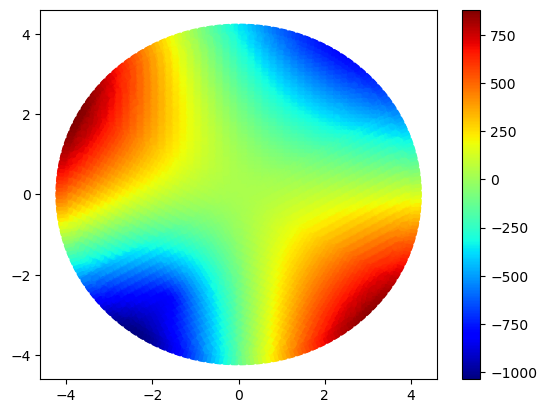

In [10]:
plt.scatter(nodex, nodey, 10, Afhp[:,0]*1e9)
plt.colorbar();

### Now we look at the data

In [11]:
dateID = '250328'
nSA = 6 #should be called nHP, just using this to avoid breaking Sec 9 IF code

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 17/250328/250328 GMT3 set1 17.2 5-7 hp1+ gmtMorph170614 -.h5: Fri Mar 28 10:54:06 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 17/250328/250328 GMT3 set1 17.2 5-7 hp1- gmtMorph170614 -.h5: Fri Mar 28 10:58:17 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 17/250328/250328 GMT3 set2 17.2 5-7 hp1- gmtMorph170614 -.h5: Fri Mar 28 11:01:54 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 17/250328/250328 GMT3 set2 17.2 5-7 hp1+ gmtMorph170614 -.h5: Fri Mar 28 11:06:10 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 17/250328/250328 GMT3 set1 17.2 5-7 hp2+ gmtMorph170614 -.h5: Fri Mar 28 11:10:47 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 17/250328/250328 GMT3 set1 17.2 5-7 hp2- gmtMorph170614 -.h5: Fri Mar 28 11:15:13 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 17/250328/

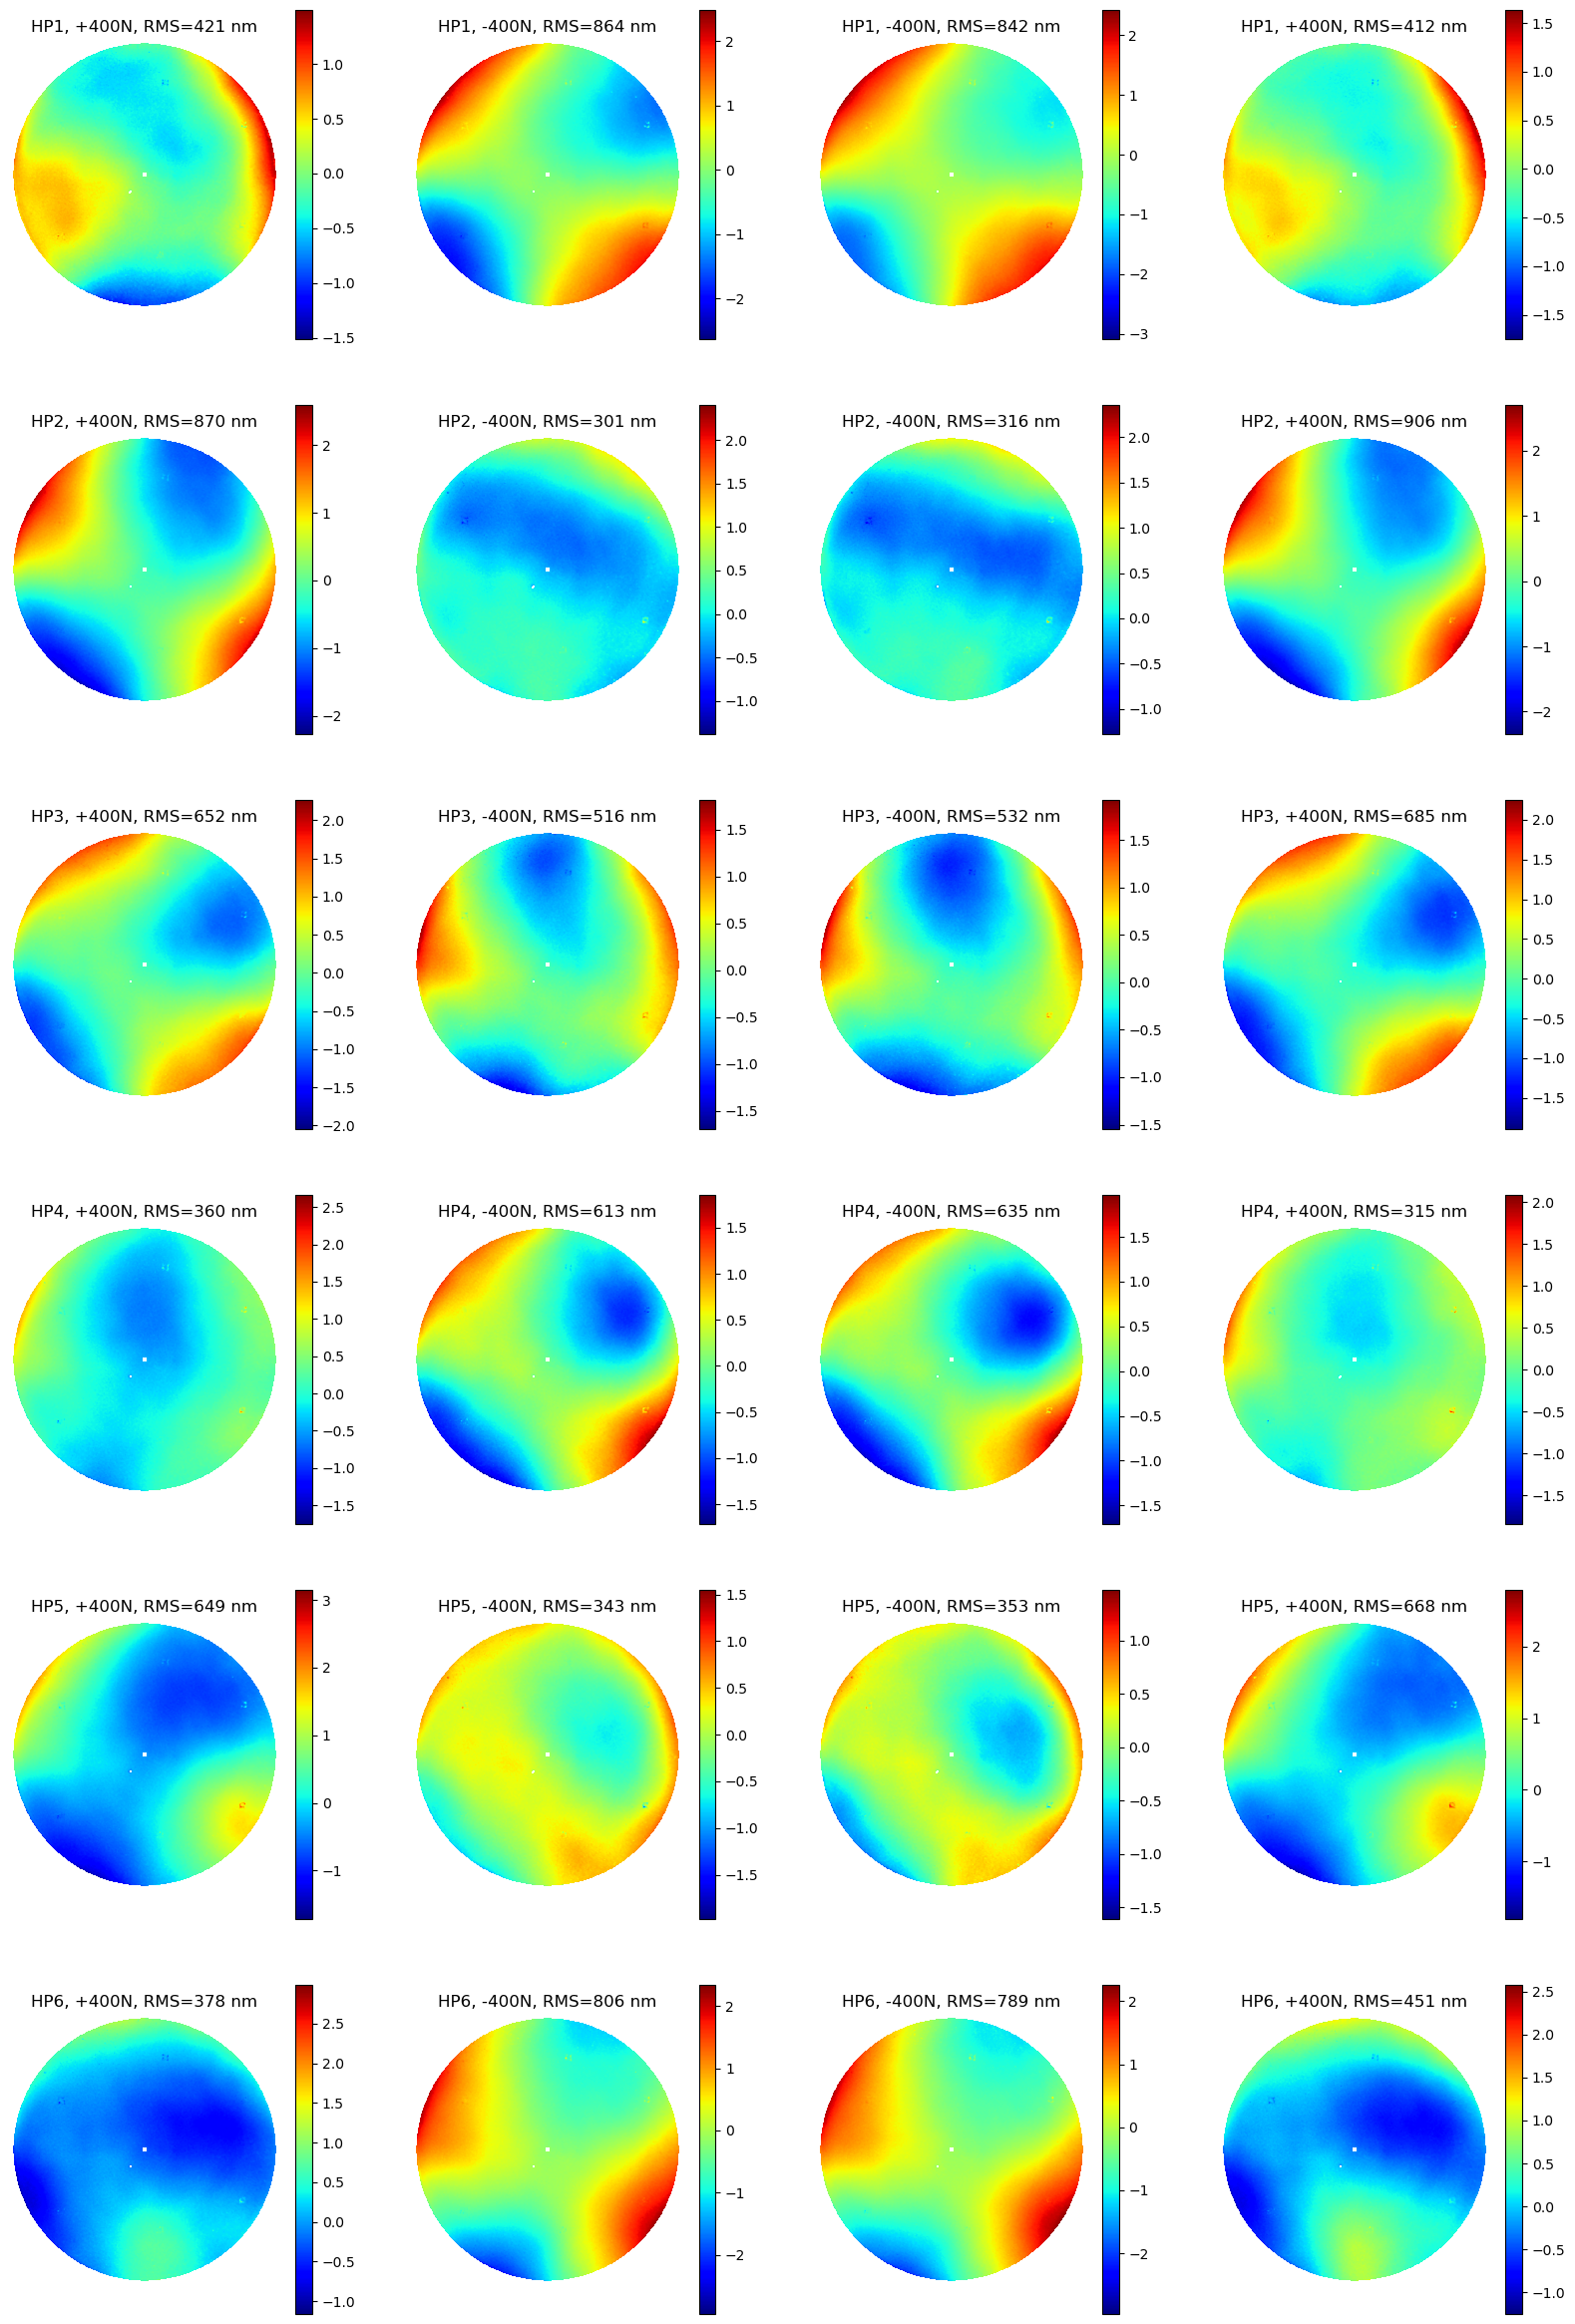

In [12]:
#look at all the +--+ maps
fig, ax = plt.subplots(nSA,4,figsize=(20,5*nSA))
i = 0
ts_array = []
for mysaID in range(1,nSA+1):

    signedBend = ['set1*act%d +'%mysaID, 'set1*act%d -'%mysaID,'set2*act%d -'%mysaID, 'set2*act%d +'%mysaID ]
    signshort = '+--+'
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1

        globstring = '%s/Sec 17/%s/*%s*-.h5'%(ml_data_dir, dateID, bend)
        globstring = globstring.replace('act%d '%mysaID, 'hp%d'%mysaID)

        #print(globstring)
        fileset = sorted(glob.glob(globstring))
        #print(fileset)
        assert len(fileset)==1
        m1s,centerRow1,centerCol1,pixelSize1, ts = readH5Map(fileset)
        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
        ts_array.append(ts)
        
        img = ax[irow][icol].imshow(m1s, origin='lower')
        fig.colorbar(img, ax=ax[irow][icol])
        mytitle = 'HP%d, %s400N, RMS=%.0f nm'%(mysaID, signshort[icol], m1rms)
        ax[irow][icol].set_title(mytitle)
        ax[irow][icol].axis('off')

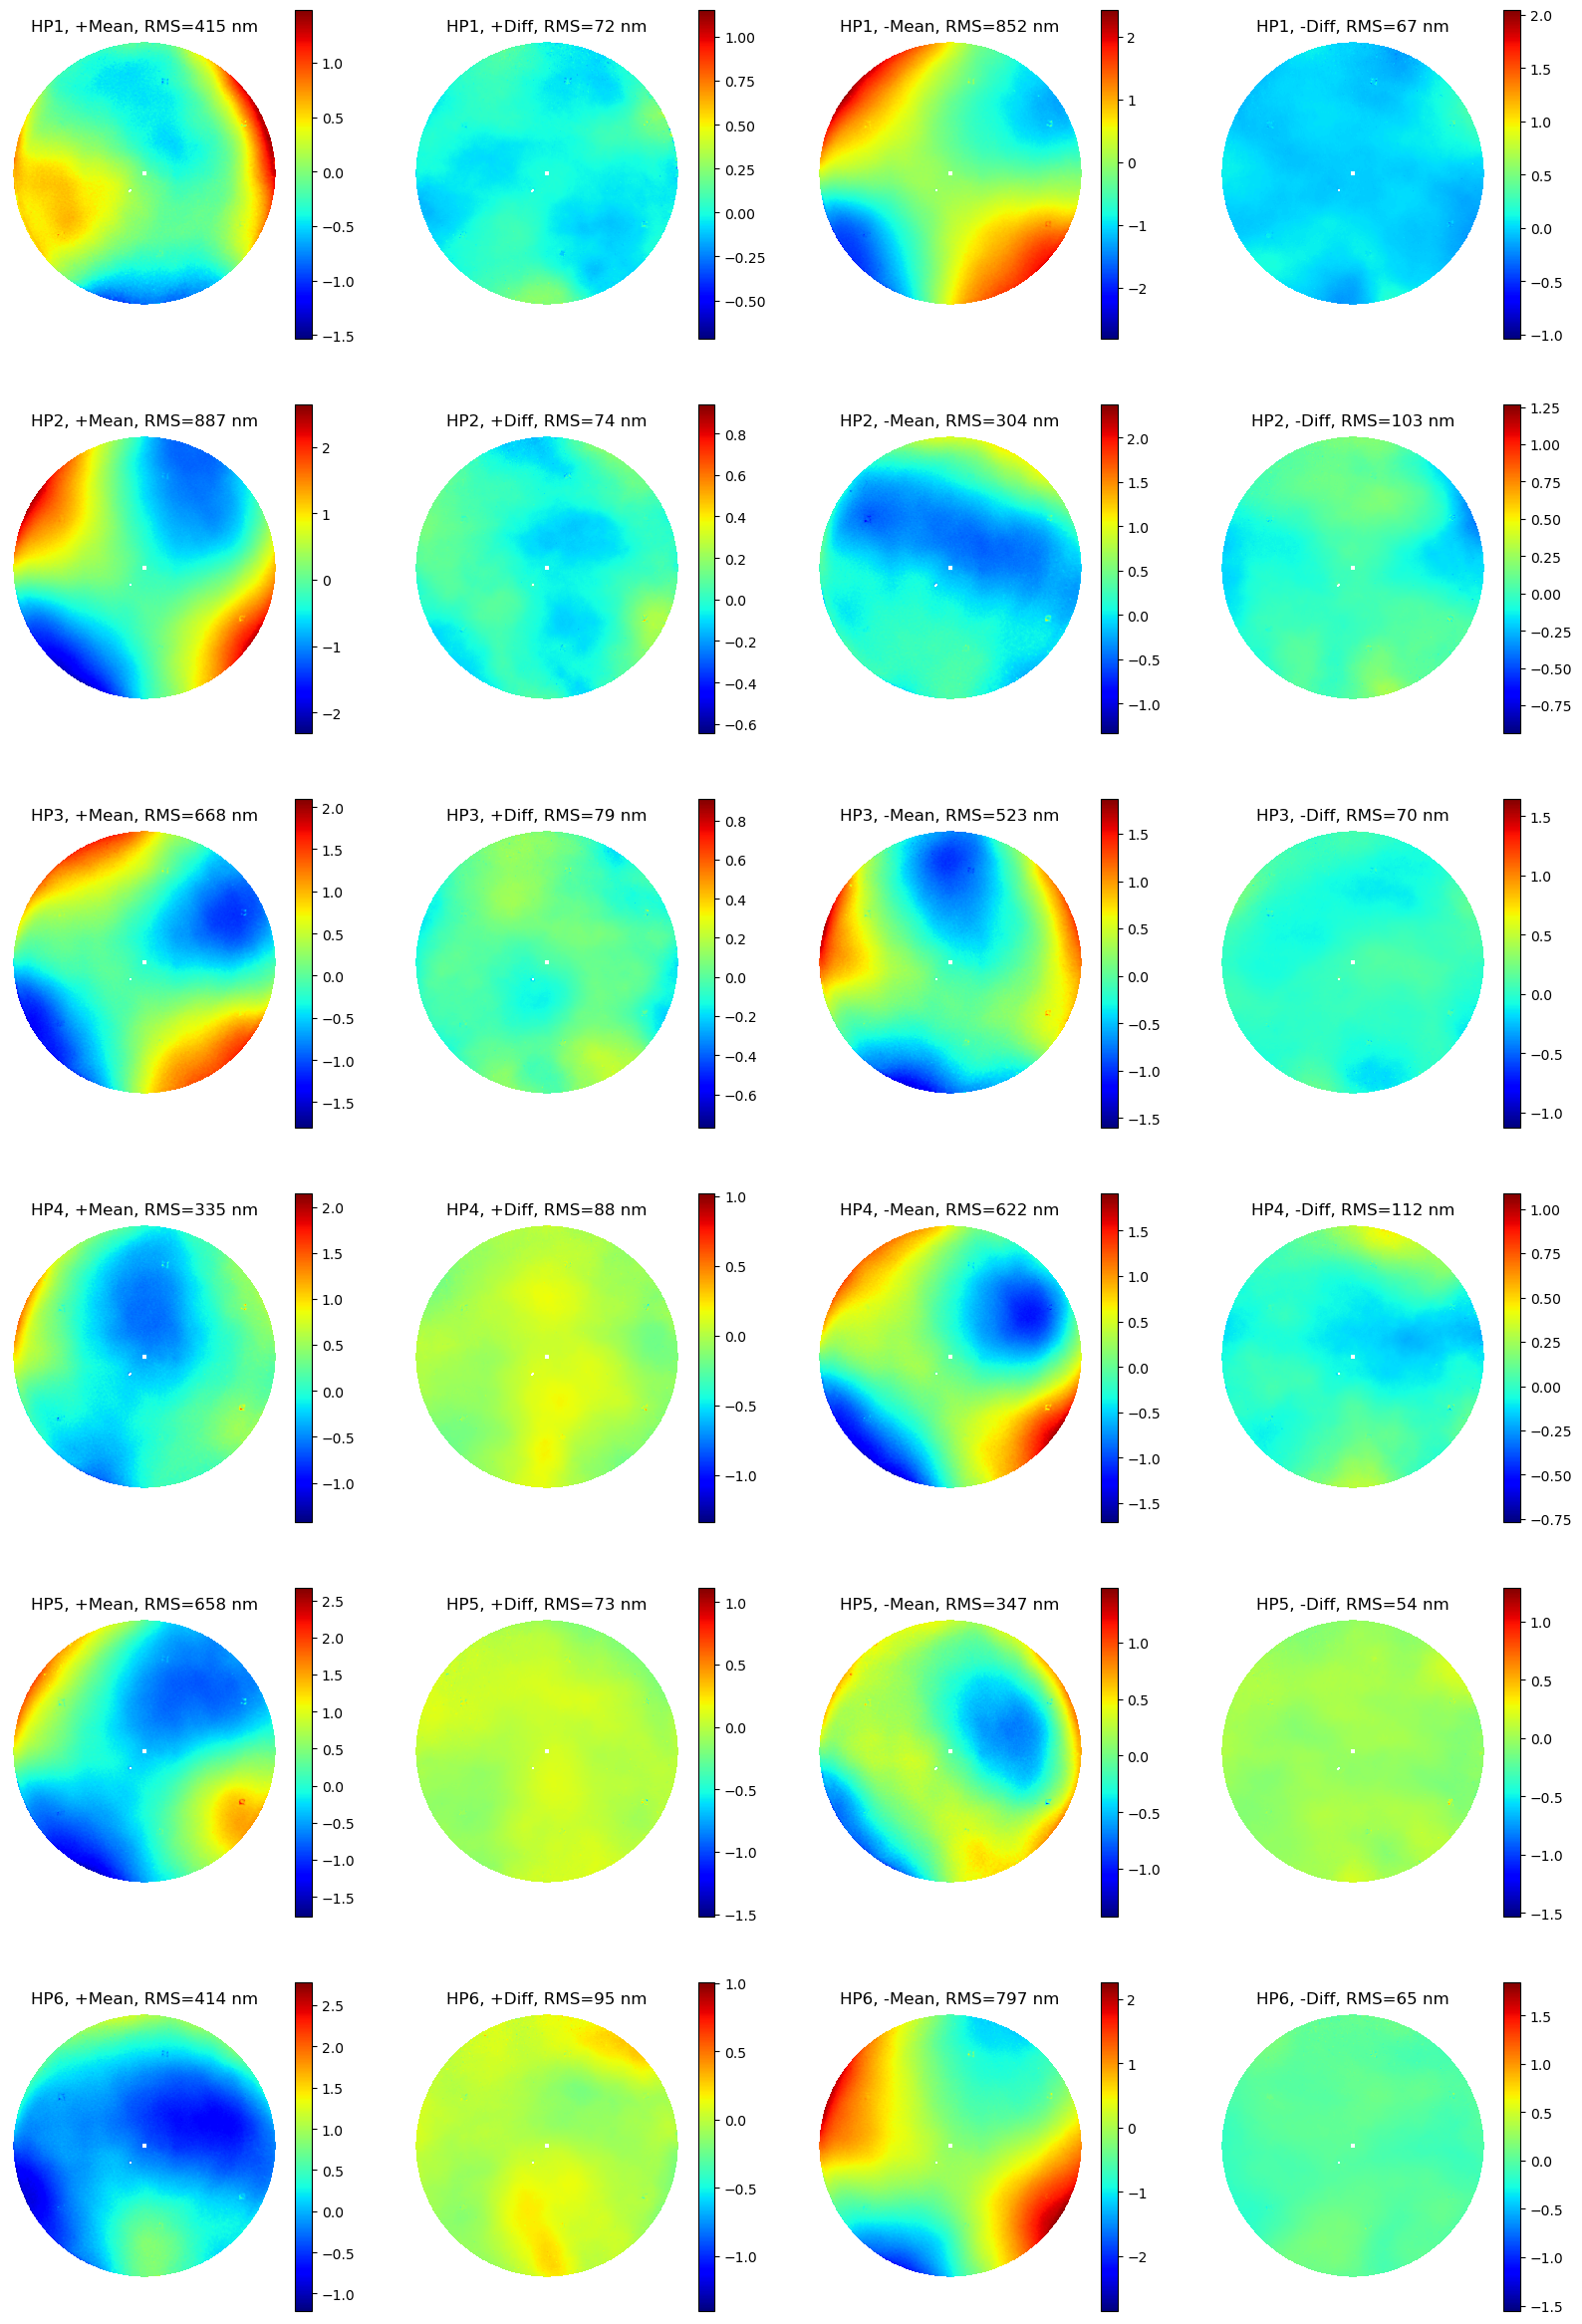

In [13]:
#look at average and diff of each ++ pair and each -- pair
stats = np.zeros((4, nSA))
fig, ax = plt.subplots(nSA,4,figsize=(20,5*nSA))
i = 0
for mysaID in range(1,nSA+1):

    aveplus = np.zeros_like(m1s)
    aveminus = np.zeros_like(m1s)
    diffplus = np.zeros_like(m1s)
    diffminus = np.zeros_like(m1s)
    signedBend = ['set1*act%d +'%mysaID, 'set1*act%d -'%mysaID,'set2*act%d -'%mysaID, 'set2*act%d +'%mysaID ]
    signshort = '+--+'
    for bend in signedBend:

        globstring = '%s/Sec 17/%s/*%s*-.h5'%(ml_data_dir, dateID, bend)
        globstring = globstring.replace('act%d '%mysaID, 'hp%d'%mysaID)

        #print(globstring)
        fileset = sorted(glob.glob(globstring))
        #print(fileset)
        m1s,centerRow1,centerCol1,pixelSize1, ts = readH5Map(fileset, verbose=False)
        if '+' in bend:
            aveplus += m1s
            if 'set1' in bend:
                diffplus -= m1s
            else:
                diffplus += m1s #set2 - set1
                aveplus /= 2
        else:
            aveminus += m1s
            if 'set1' in bend:
                diffminus -= m1s
            else:
                diffminus += m1s
                aveminus /= 2
    for j in range(4):
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        if j==0:
            m1s = aveplus
            img = ax[irow][icol].imshow(m1s, origin='lower')
            fig.colorbar(img, ax=ax[irow][icol])
            m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
            mytitle = 'HP%d, +Mean, RMS=%.0f nm'%(mysaID, m1rms)
        elif j==1:
            m1s = diffplus
            img = ax[irow][icol].imshow(m1s, origin='lower')
            fig.colorbar(img, ax=ax[irow][icol])
            m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
            mytitle = 'HP%d, +Diff, RMS=%.0f nm'%(mysaID, m1rms)           
        elif j==2:
            m1s = aveminus
            img = ax[irow][icol].imshow(m1s, origin='lower')
            fig.colorbar(img, ax=ax[irow][icol])
            m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
            mytitle = 'HP%d, -Mean, RMS=%.0f nm'%(mysaID, m1rms)
        elif j==3:
            m1s = diffminus
            img = ax[irow][icol].imshow(m1s, origin='lower')
            fig.colorbar(img, ax=ax[irow][icol])
            m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
            mytitle = 'HP%d, -Diff, RMS=%.0f nm'%(mysaID, m1rms)  

        ax[irow][icol].set_title(mytitle)
        ax[irow][icol].axis('off')
        stats[j, mysaID-1] = m1rms

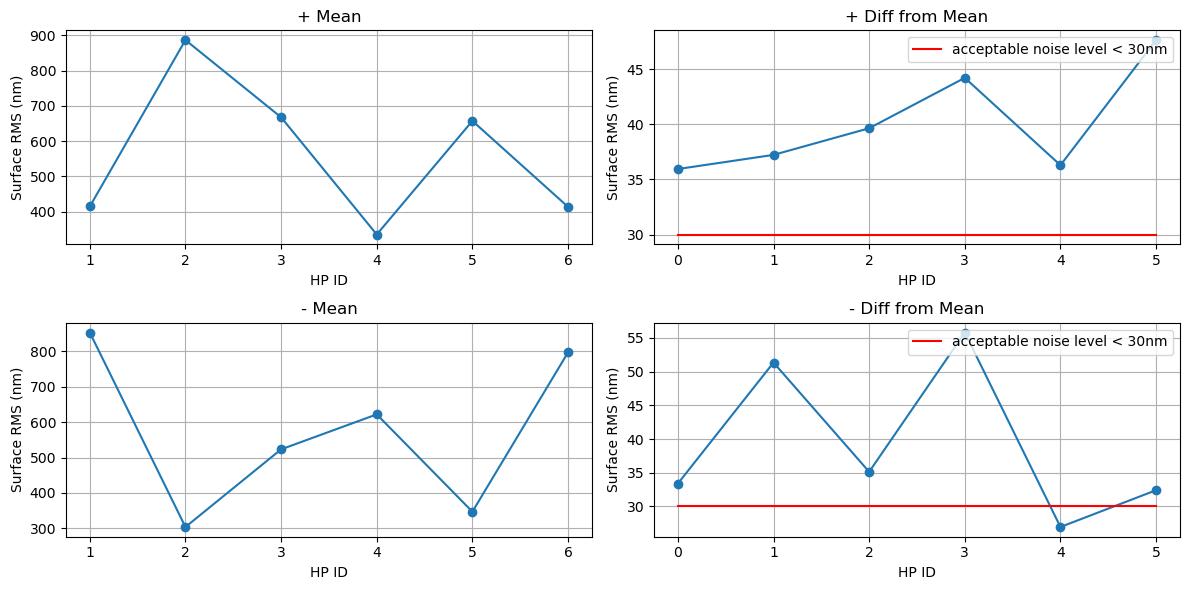

In [14]:
fig, ax = plt.subplots(2,2,figsize=(12, 6))
i = 0
j = 0
ax[i][j].plot(range(1,nSA+1), stats[0,:],'-o')
ax[i][j].grid()
ax[i][j].set_xlabel('HP ID')
ax[i][j].set_title('+ Mean')
ax[i][j].set_ylabel('Surface RMS (nm)')
i = 0
j = 1
ax[i][j].plot(stats[j,:]/2,'-o')
ax[i][j].plot([0, nSA-1],[30,30],'-r', label='acceptable noise level < 30nm')
ax[i][j].grid()
ax[i][j].legend(loc='upper right')
ax[i][j].set_xlabel('HP ID')
ax[i][j].set_title('+ Diff from Mean')
ax[i][j].set_ylabel('Surface RMS (nm)')
i = 1
j = 0
ax[i][j].plot(range(1,nSA+1), stats[2,:],'-o')
ax[i][j].grid()
ax[i][j].set_xlabel('HP ID')
ax[i][j].set_title('- Mean')
ax[i][j].set_ylabel('Surface RMS (nm)')
i = 1
j = 1
ax[i][j].plot(stats[3,:]/2,'-o')
ax[i][j].plot([0, nSA-1],[30,30],'-r', label='acceptable noise level < 30nm')
ax[i][j].grid()
ax[i][j].legend(loc='upper right')
ax[i][j].set_xlabel('HP ID')
ax[i][j].set_title('- Diff from Mean')
ax[i][j].set_ylabel('Surface RMS (nm)')

plt.tight_layout()


#### Now calculate the single SA influence fuctions

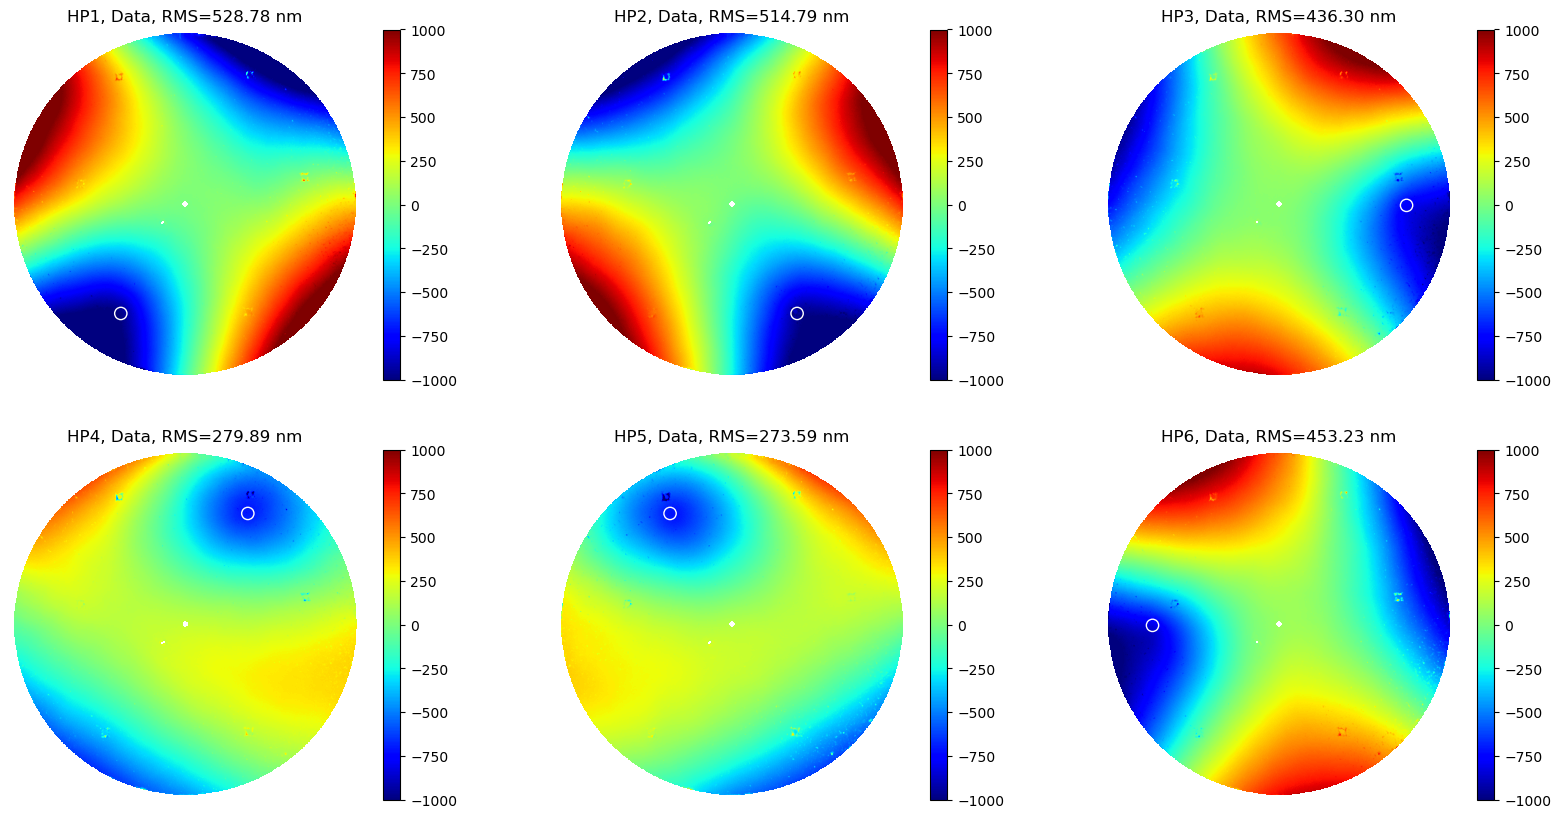

In [17]:
myIF = np.zeros((Sxn, Syn, nSA))
nrow = int(np.ceil(nSA/3.))
fig, ax = plt.subplots(nrow,3,figsize=(20,5*nrow))
i = 0
for mysaID in range(1,nSA+1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1

    signedBend = ['set1*act%d +'%mysaID, 'set1*act%d -'%mysaID,'set2*act%d -'%mysaID, 'set2*act%d +'%mysaID ]
    signshort = '+--+'    
    for bend in signedBend:
        globstring = '%s/Sec 17/%s/*%s*-.h5'%(ml_data_dir, dateID, bend)
        globstring = globstring.replace('act%d '%mysaID, 'hp%d'%mysaID)

        #print(globstring)
        fileset = sorted(glob.glob(globstring))
        #print(fileset)
        m1s,centerRow,centerCol,pixelSize, ts = readH5Map(fileset, verbose=False)
        if '+' in bend:
            myIF[:,:,i-1] += m1s
        else:
            myIF[:,:,i-1] -= m1s
    myIF[:,:,i-1] /= (4*1) #400N, but do not normalize to 1N, b/c we compare to FEM where 400N is applied.
    myIF[:,:,i-1] = -myIF[:,:,i-1].T *1000 #convert into nm
    m1s = myIF[:,:,i-1]
    m1rms = np.std(m1s[~np.isnan(m1s)])

    img = ax[irow][icol].imshow(m1s, origin='lower', vmin=-1000, vmax=1000)
    fig.colorbar(img, ax=ax[irow][icol])
    mytitle = 'HP%d, Data, RMS=%.2f nm'%(mysaID, m1rms)

    ax[irow][icol].set_title(mytitle)
    circle = plt.Circle((centerCol+hpx[mysaID-1]/pixelSize, centerRow+hpy[mysaID-1]/pixelSize),15, fill=False, color='w')
    ax[irow][icol].add_artist(circle)
    ax[irow][icol].axis('off')

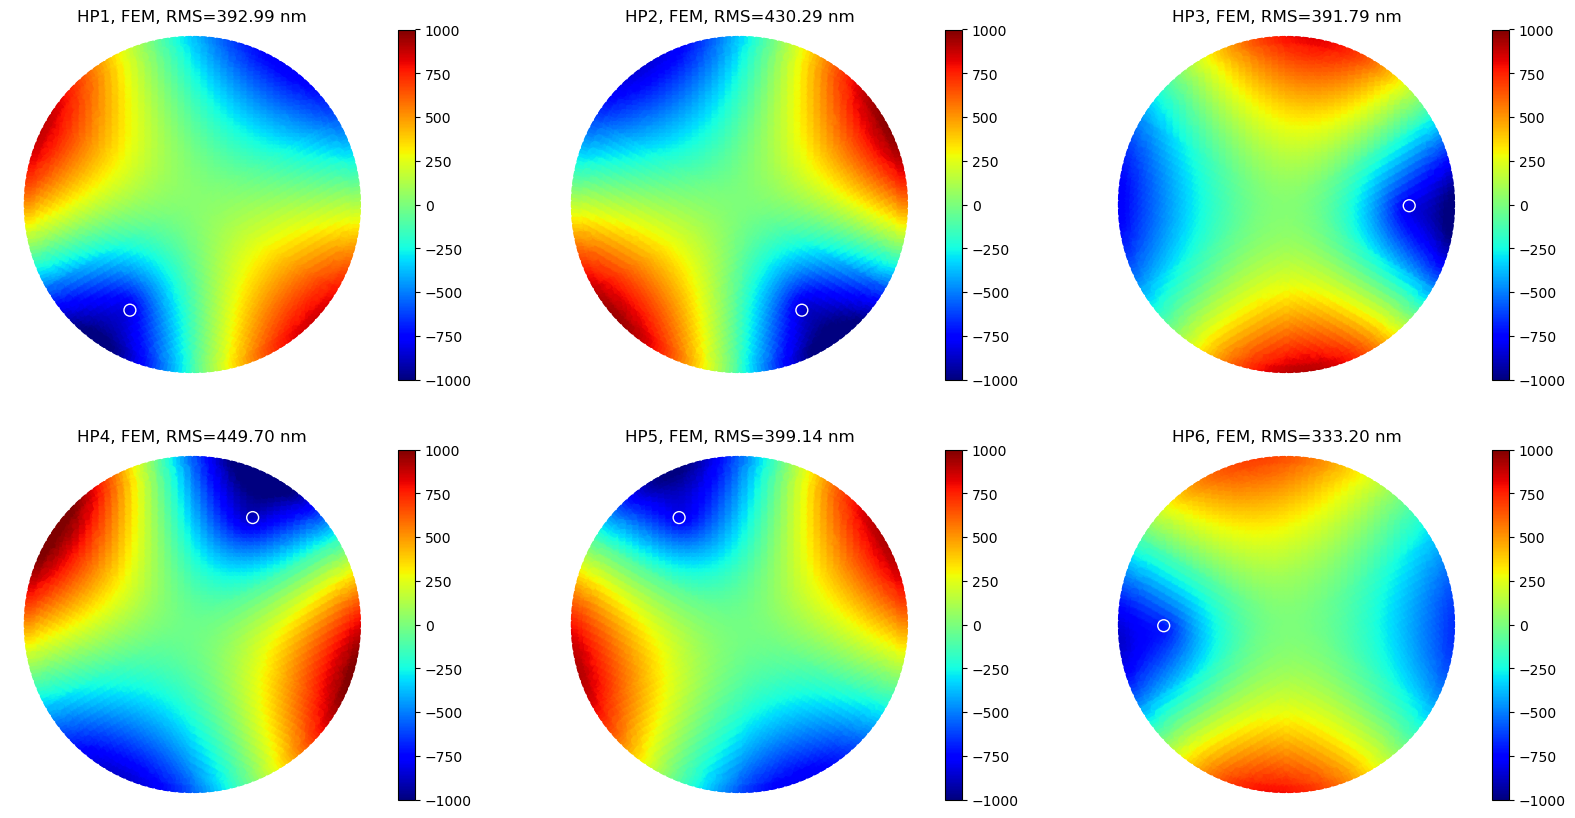

In [18]:
nrow = np.max((int(np.ceil(nSA/3.)),2))
fig, ax = plt.subplots(nrow,3,figsize=(20,5*nrow))
i = 0
for mysaID in range(1,nSA+1):

    modeID = mysaID
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, Afhp[:,modeID-1]*1e9, vmin=-1000, vmax=1000) #unit to nm
    m1rms = np.std(Afhp[:,modeID-1]*1e9)
    ax[irow][icol].set_title('HP%d, FEM, RMS=%.2f nm'%(mysaID, m1rms))

    circle = plt.Circle((hpx[mysaID-1], hpy[mysaID-1]),0.15, fill=False, color='w')
    ax[irow][icol].add_artist(circle)
    ax[irow][icol].axis('equal')
    ax[irow][icol].axis('off')
    fig.colorbar(img, ax=ax[irow][icol])

#### Perform a least-square fit for each influence function using the FEM-determined influence function. Check the scaling factor and residual from fit. Normalize the residual to 1 N force on the actuator being tested.

HP1, Scaling factor =1.324, Residual RMS = 81.118 nm
HP2, Scaling factor =1.175, Residual RMS = 86.677 nm
HP3, Scaling factor =0.956, Residual RMS = 220.216 nm
HP4, Scaling factor =0.539, Residual RMS = 137.422 nm
HP5, Scaling factor =0.585, Residual RMS = 140.795 nm
HP6, Scaling factor =1.184, Residual RMS = 220.351 nm
scaling factor <1 means mirror stiffer than FEM, i.e., model too soft.


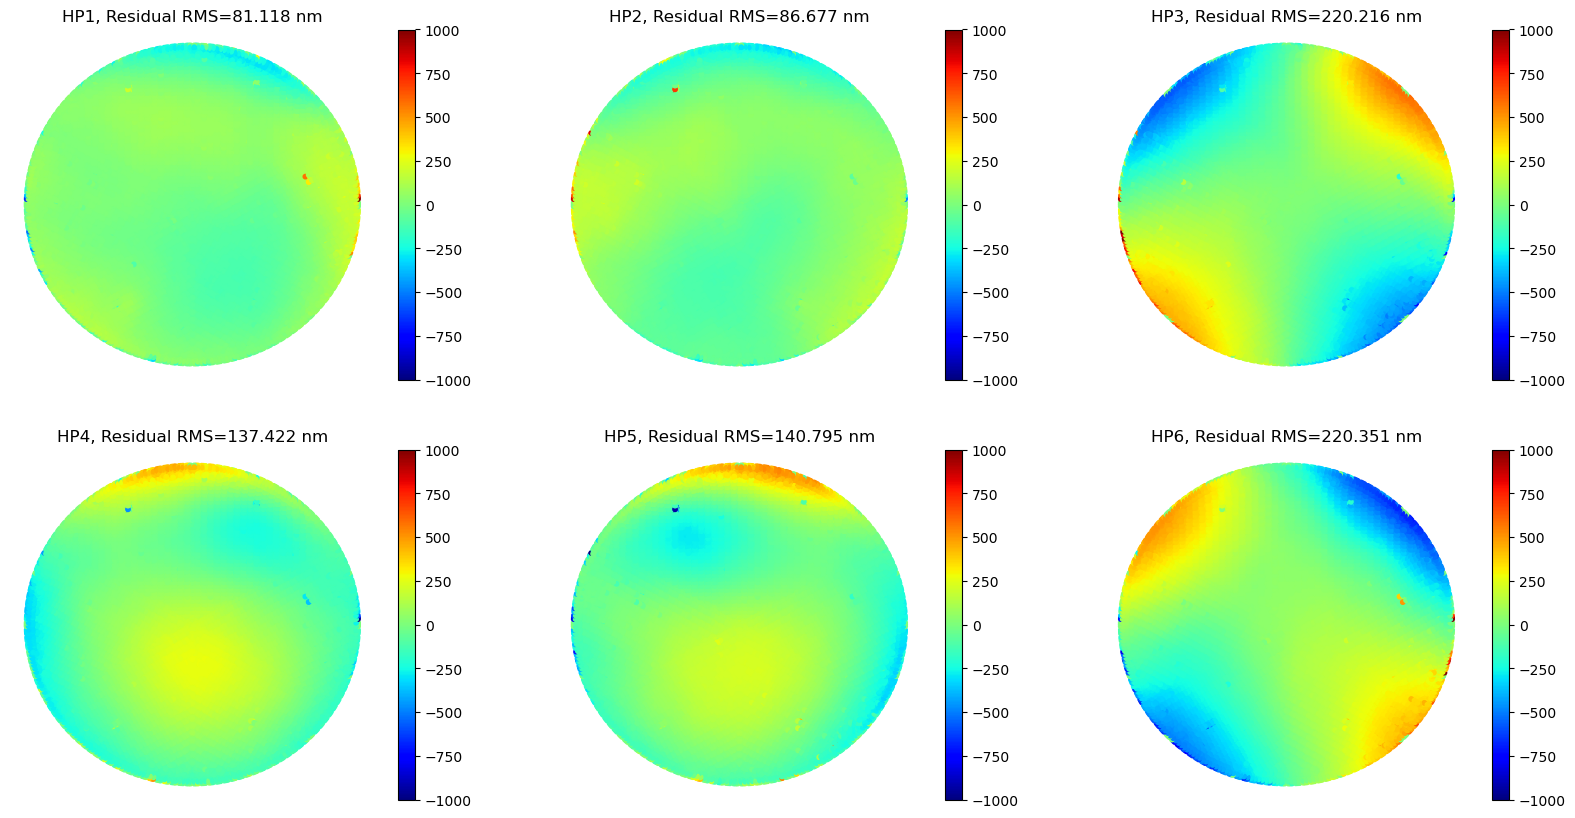

In [22]:
#These 2D interpolations between large grids take a few minutes to run

from scipy.interpolate import LinearNDInterpolator 

scaleF = np.zeros((nSA, 1))
#[x1, y1] are the x and y grid in M1B. 
#CenterCol and centerRow are swapped, because they were meant for h5 CS
#Lines below, we will transpose the h5 map to match this.
#.  we will also reverse the sign of h5 maps to be in M1B.
[x1, y1] = mkXYGrid(m1s, centerCol, centerRow, pixelSize)

nrow = int(np.ceil(nSA/3.))
fig, ax = plt.subplots(nrow,3,figsize=(20,5*nrow))
i = 0
for mysaID in range(1,nSA+1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1

    if2d = np.squeeze(myIF[:,:,i-1]) #myIF is already in M1B, in nm
    mask = ~np.isnan(if2d)

    interp = LinearNDInterpolator(list(zip(x1[mask], y1[mask])), if2d[mask], fill_value=0)
    mapOntoGMTFEgrid = interp(nodex, nodey).ravel()
    validIdx = mapOntoGMTFEgrid!=0
    mapOntoGMTFEgrid[~validIdx] = np.nan
    scaleF[i-1] = np.linalg.pinv(Afhp[validIdx,i-1].reshape((-1,1))*1e9)  @ mapOntoGMTFEgrid[validIdx] #all in nm
    residual = mapOntoGMTFEgrid - scaleF[i-1]* np.squeeze(Afhp[:,i-1])*1e9 #this is residual
    residual[np.isnan(residual)] = 0
    
    m1rms = np.std(residual[~np.isnan(residual)]) #already in nm
    mytitle = 'HP%d, Scaling factor =%.3f, Residual RMS = %.3f nm'%(mysaID, scaleF[i-1], m1rms)
    print(mytitle)
    
    img = ax[irow][icol].scatter(nodex, nodey, 10, residual, vmin=-1000, vmax=1000)
    fig.colorbar(img, ax=ax[irow][icol])
    mytitle = 'HP%d, Residual RMS=%.3f nm'%(mysaID, m1rms)
    ax[irow][icol].set_title(mytitle)
    circle = plt.Circle((centerCol+hpx[mysaID-1]/pixelSize, centerRow+hpy[mysaID-1]/pixelSize),15, fill=False)
    ax[irow][icol].add_artist(circle)
    ax[irow][icol].axis('off')
print('scaling factor <1 means mirror stiffer than FEM, i.e., model too soft.')

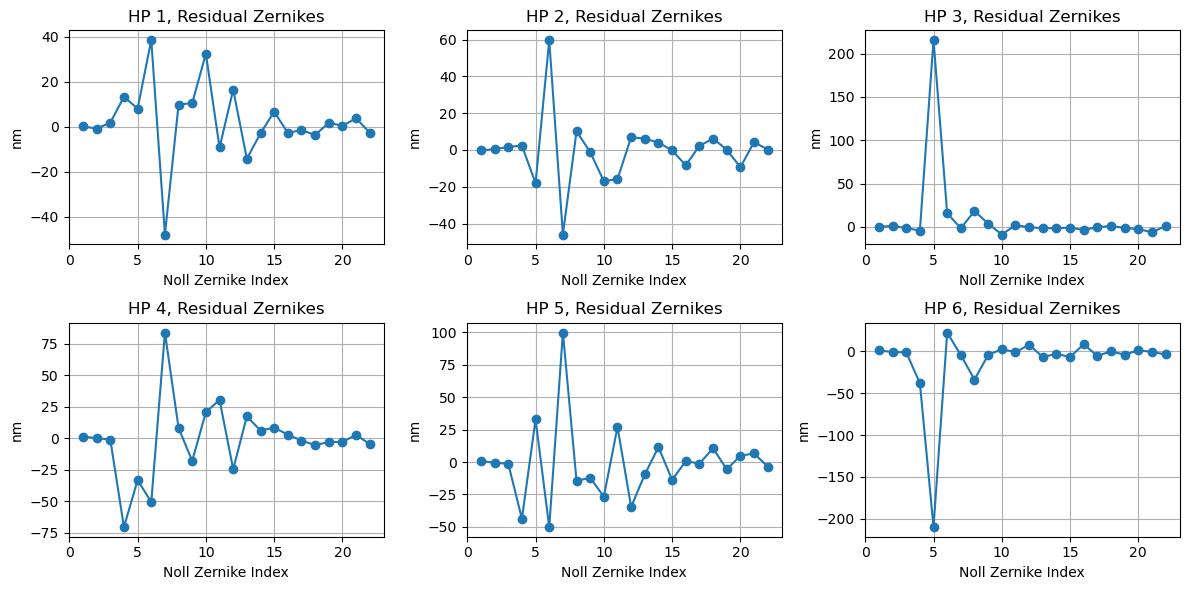

In [26]:
#decompose the residuals into Zernikes
nzer = 22

nrow = int(np.ceil(nSA/3.))
fig, ax = plt.subplots(nrow,3,figsize=(12,3*nrow))
i = 0
for mysaID in range(1,nSA+1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1

    if2d = np.squeeze(myIF[:,:,i-1]) #myIF is already in M1B, in nm
    mask = ~np.isnan(if2d)

    interp = LinearNDInterpolator(list(zip(x1[mask], y1[mask])), if2d[mask], fill_value=0)
    mapOntoGMTFEgrid = interp(nodex, nodey).ravel()
    validIdx = mapOntoGMTFEgrid!=0
    scaleF[i-1] = np.linalg.pinv(Afhp[validIdx,i-1].reshape((-1,1))*1e9)  @ mapOntoGMTFEgrid[validIdx] #all in nm
    residual = mapOntoGMTFEgrid[validIdx] - scaleF[i-1]* np.squeeze(Afhp[validIdx,i-1])*1e9 #this is residual
    
    nnodes = residual.shape[0]
    zerU = np.zeros((nnodes, nzer))
    for ii in range(nzer):
        zerU[:,ii] = zernike_polynomial(ii+1, nodex[validIdx]/radius_of_CA, nodey[validIdx]/radius_of_CA).flatten()
    mycoeff = zerU.transpose() / nnodes @ residual

    ax[irow][icol].plot(np.arange(1,nzer+1),mycoeff,'-o')
    ax[irow][icol].set_title('HP %d, Residual Zernikes'%mysaID)
    ax[irow][icol].grid()
    ax[irow][icol].set_ylabel('nm')
    ax[irow][icol].set_xlabel('Noll Zernike Index')
plt.tight_layout()

### Check HP forces and encoders

In [27]:
hp_force_all, tt = getDBData(unix_ts(ts_array[0])-580,'m1_s1_support_ctrl/s/hp_force/value', 
                             duration_in_s=unix_ts(ts_array[-1])-unix_ts(ts_array[0])+820, samples=120)
hp_force_all_ave = np.mean(hp_force_all,axis=0)
print(hp_force_all.shape)

m1_s1_support_ctrl/s/hp_force/value
2025-03-28 10:44:26  duration =  7568  s
(120, 6)
(120, 6)


In [28]:
ts_array[-1]

'Fri Mar 28 12:46:34 2025'

In [31]:
ts_minutes = np.array([unix_ts(i)-tt[0] for i in ts_array])/60
band_width = 2
for i in range(6):
    plt.plot((tt-tt[0])/60., hp_force_all[:,i], label='HP%d'%(i+1))
plt.xlabel('Time (in minutes)')
plt.ylabel('HP force (N)')
plt.legend(bbox_to_anchor=(1, 1))
if 1:
    for i,t in enumerate(ts_minutes):
        plt.axvspan(t - band_width-1, t-1, color='gray', alpha=0.3)  # Ends at t, goes back 6 min
        plt.text(t - band_width / 2-1, plt.ylim()[1], f"{int(i/4)+1}", 
                    color='black', fontsize=12, fontweight='bold',
                    ha='center', va='bottom')  # Label bands at the top center    

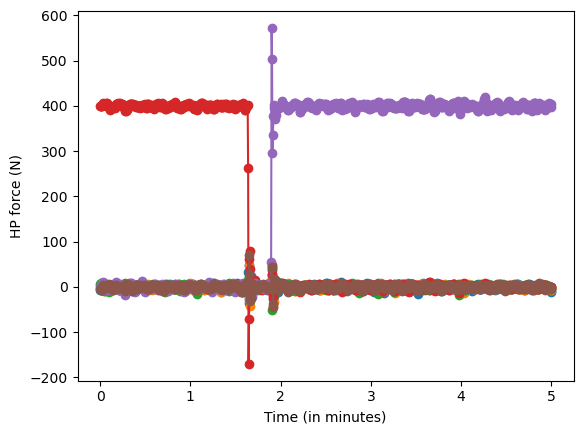

In [119]:
#no longer needed. kept for future in case of need.
#this cell was used for examining some seemingly overlaying peaks in the above figure
hp_force_all, tt = getDBData(unix_ts(ts_array[8])+60*28,'m1_s1_support_ctrl/s/hp_force/value', 
                             duration_in_s=60*5, samples=1000)
hp_force_all_ave = np.mean(hp_force_all,axis=0)
print(hp_force_all.shape)
#fig, ax = plt.subplots(1,1,figsize=(20,5))
for i in range(6):
    plt.plot((tt-tt[0])/60., hp_force_all[:,i], '-o', label='HP%d'%(i+1))
plt.xlabel('Time (in minutes)')
plt.ylabel('HP force (N)')
#plt.xlim([25, 35])
#plt.legend()  

m1_s1_support_ctrl/i/hp_mirror_encoder_position/value
2025-03-28 10:44:26  duration =  7568  s
(120, 6)


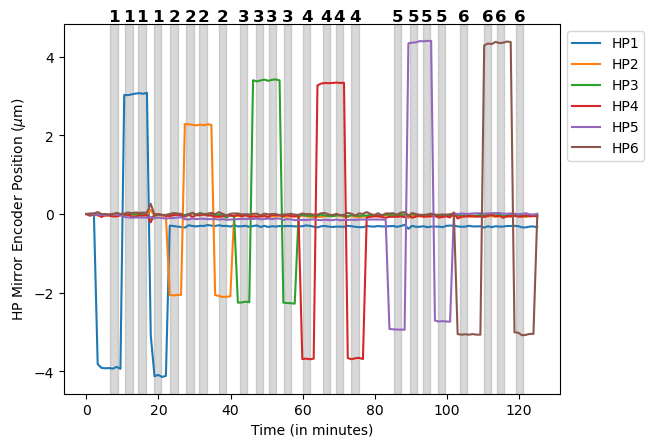

In [32]:
hp_length_all, tt = getDBData(unix_ts(ts_array[0])-580,'m1_s1_support_ctrl/i/hp_mirror_encoder_position/value', 
                             duration_in_s=unix_ts(ts_array[-1])-unix_ts(ts_array[0])+820, samples=120)

ts_minutes = np.array([unix_ts(i)-tt[0] for i in ts_array])/60

for i in range(6):
    plt.plot((tt-tt[0])/60., (hp_length_all[:,i]-hp_length_all[0,i])*1e6, label='HP%d'%(i+1))
plt.xlabel('Time (in minutes)')
plt.ylabel(r'HP Mirror Encoder Position ($\mu$m)')
#plt.xlim([25, 35])
plt.legend(bbox_to_anchor=(1, 1)) #ncol=6,fontsize=8)
if 1:
    for i,t in enumerate(ts_minutes):
        plt.axvspan(t - band_width-1, t-1, color='gray', alpha=0.3)  # Ends at t, goes back 6 min
        plt.text(t - band_width / 2-1, plt.ylim()[1], f"{int(i/4)+1}", 
                    color='black', fontsize=12, fontweight='bold',
                    ha='center', va='bottom')  # Label bands at the top center  

m1_s1_support_ctrl/i/hp_actuator_encoder_position/value
2025-03-28 10:44:26  duration =  7568  s
(120, 6)


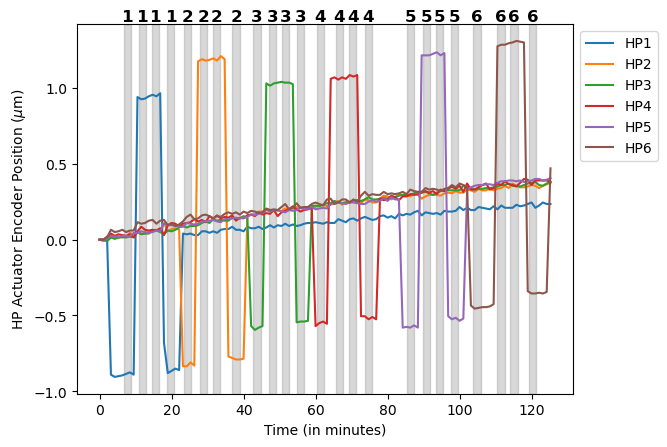

In [33]:
hp_length_all, tt = getDBData(unix_ts(ts_array[0])-580,'m1_s1_support_ctrl/i/hp_actuator_encoder_position/value', 
                             duration_in_s=unix_ts(ts_array[-1])-unix_ts(ts_array[0])+820, samples=120)
ts_minutes = np.array([unix_ts(i)-tt[0] for i in ts_array])/60

for i in range(6):
    plt.plot((tt-tt[0])/60., (hp_length_all[:,i]-hp_length_all[0,i])*1e6, label='HP%d'%(i+1))
plt.xlabel('Time (in minutes)')
plt.ylabel(r'HP Actuator Encoder Position ($\mu$m)')
#plt.xlim([25, 35])
plt.legend(bbox_to_anchor=(1, 1)) #ncol=6,fontsize=8)
if 1:
    for i,t in enumerate(ts_minutes):
        plt.axvspan(t - band_width-1, t-1, color='gray', alpha=0.3)  # Ends at t, goes back 6 min
        plt.text(t - band_width / 2-1, plt.ylim()[1], f"{int(i/4)+1}", 
                    color='black', fontsize=12, fontweight='bold',
                    ha='center', va='bottom')  # Label bands at the top center 